In [2]:
from roboflow import Roboflow
import os
import matplotlib.pyplot as plt
import cv2
import random
from ultralytics import YOLO

In [7]:
rf = Roboflow(api_key="4zGCDGgIjB5Lg8TVVqSY")
project = rf.workspace("deep-nhhm8").project("my-first-project-prs1r")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


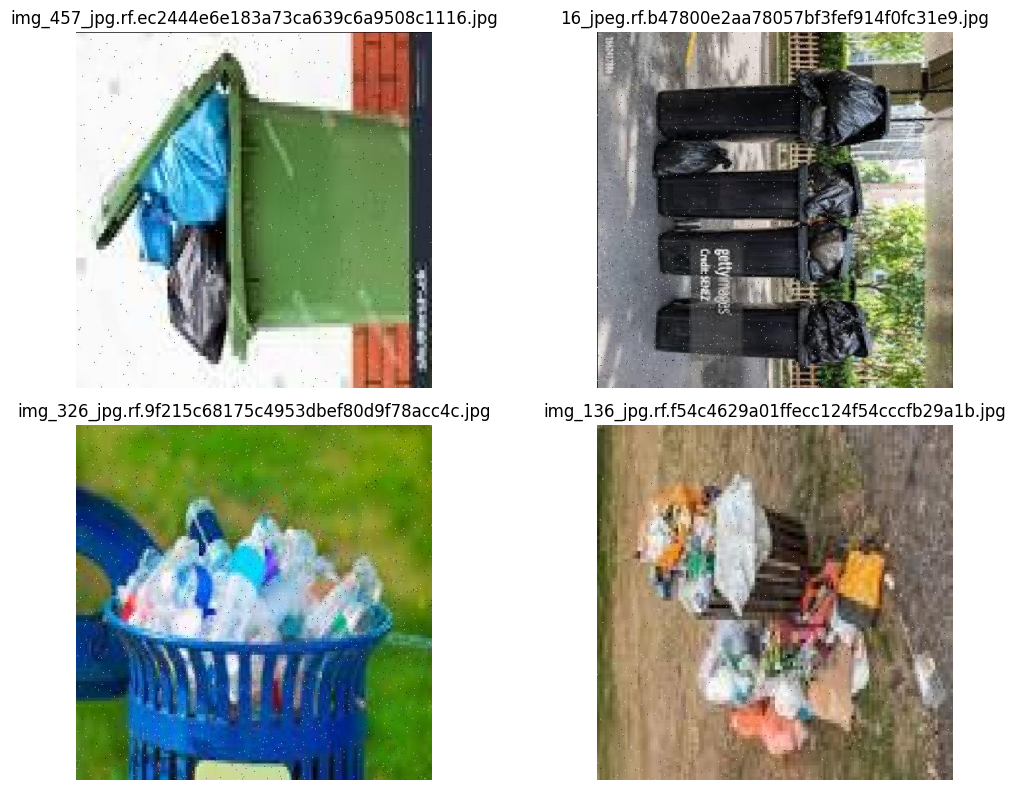

In [ ]:
data_path = dataset.location  # chemin vers le dossier du dataset
train_images_path = os.path.join(data_path, "train", "images")
# Affichage de  4 images aléatoires
sample_images = random.sample(os.listdir(train_images_path),4)

plt.figure(figsize=(12, 8))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_images_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR -> RGB

    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Création  du modèle YOLOv8
model = YOLO("yolov8n.pt")  

In [11]:
print("\nDémarrage de l'entraînement...\n")

model.train(
    data=os.path.join(data_path, "data.yaml"),
    epochs=40,
    imgsz=640,
    batch=16,
    name="yolov8_training",
    project="runs_training"
)


Démarrage de l'entraînement...

Ultralytics 8.3.229  Python-3.10.18 torch-2.9.1+cpu CPU (Intel Core i5-8350U 1.70GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=c:\Users\Lenovo\Desktop\Projet a rendre\My-First-Project-2\data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_training2, nbs=64, nms=False, opset=None, optimize=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000020661DBCC70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.048

In [18]:
model = YOLO("runs_training/yolov8_training2/weights/best.pt")
results = model("image_test5.webp")  # ton image à analyser


image 1/1 c:\Users\Lenovo\Desktop\Projet a rendre\image_test5.webp: 640x512 1 poubelle_vide, 262.9ms
Speed: 10.8ms preprocess, 262.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 512)
